In [81]:
# imports
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer


import string
import os

In [19]:
# installs
# !pip install numpy matplotlib pandas missingno

# data preparation

In [82]:
datapath = './data'
fileName = 'agriRuralDevelopment.csv'

df_oig = pd.read_csv(os.path.join(datapath, fileName), index_col=False)

## removing aggregated values

In [83]:
shape_before = df_oig.shape
aggregated_list = ["Arab World" ,
        "Caribbean small states", 
        "Central Europe and the Baltics", 
        "East Asia & Pacific",
        "European Union",
        "Europe & Central Asia",
        "Latin America & Caribbean",
        "Middle East & North Africa",
        "North America",
        "Small states",
        "South Asia",
        "Sub-Saharan Africa",
        "World"
        ]

df = df_oig.loc[df_oig["Country Name"].apply(lambda x : x not in aggregated_list)].reset_index(drop = True)
df.head()
shape_after = df.shape

print(shape_before, shape_after, shape_before[0] - shape_after[0])

(13908, 55) (13115, 55) 793


<AxesSubplot: >

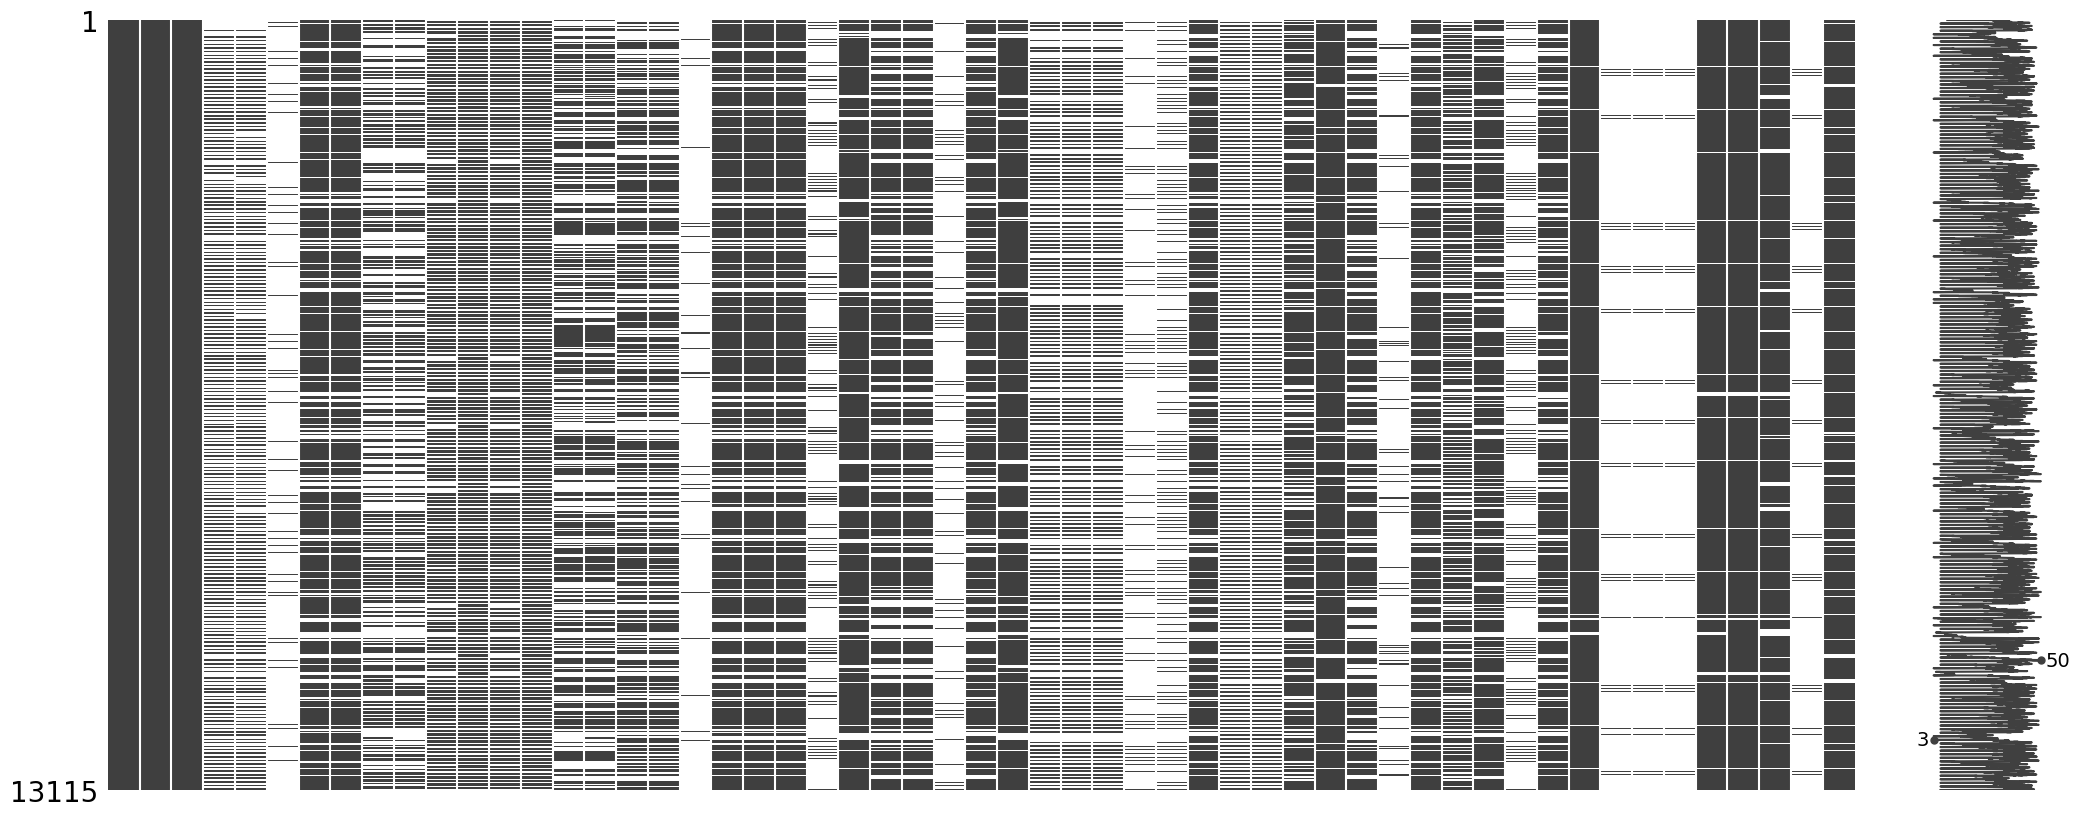

In [84]:
msno.matrix(df)

## selecting well represented columns

<AxesSubplot: >

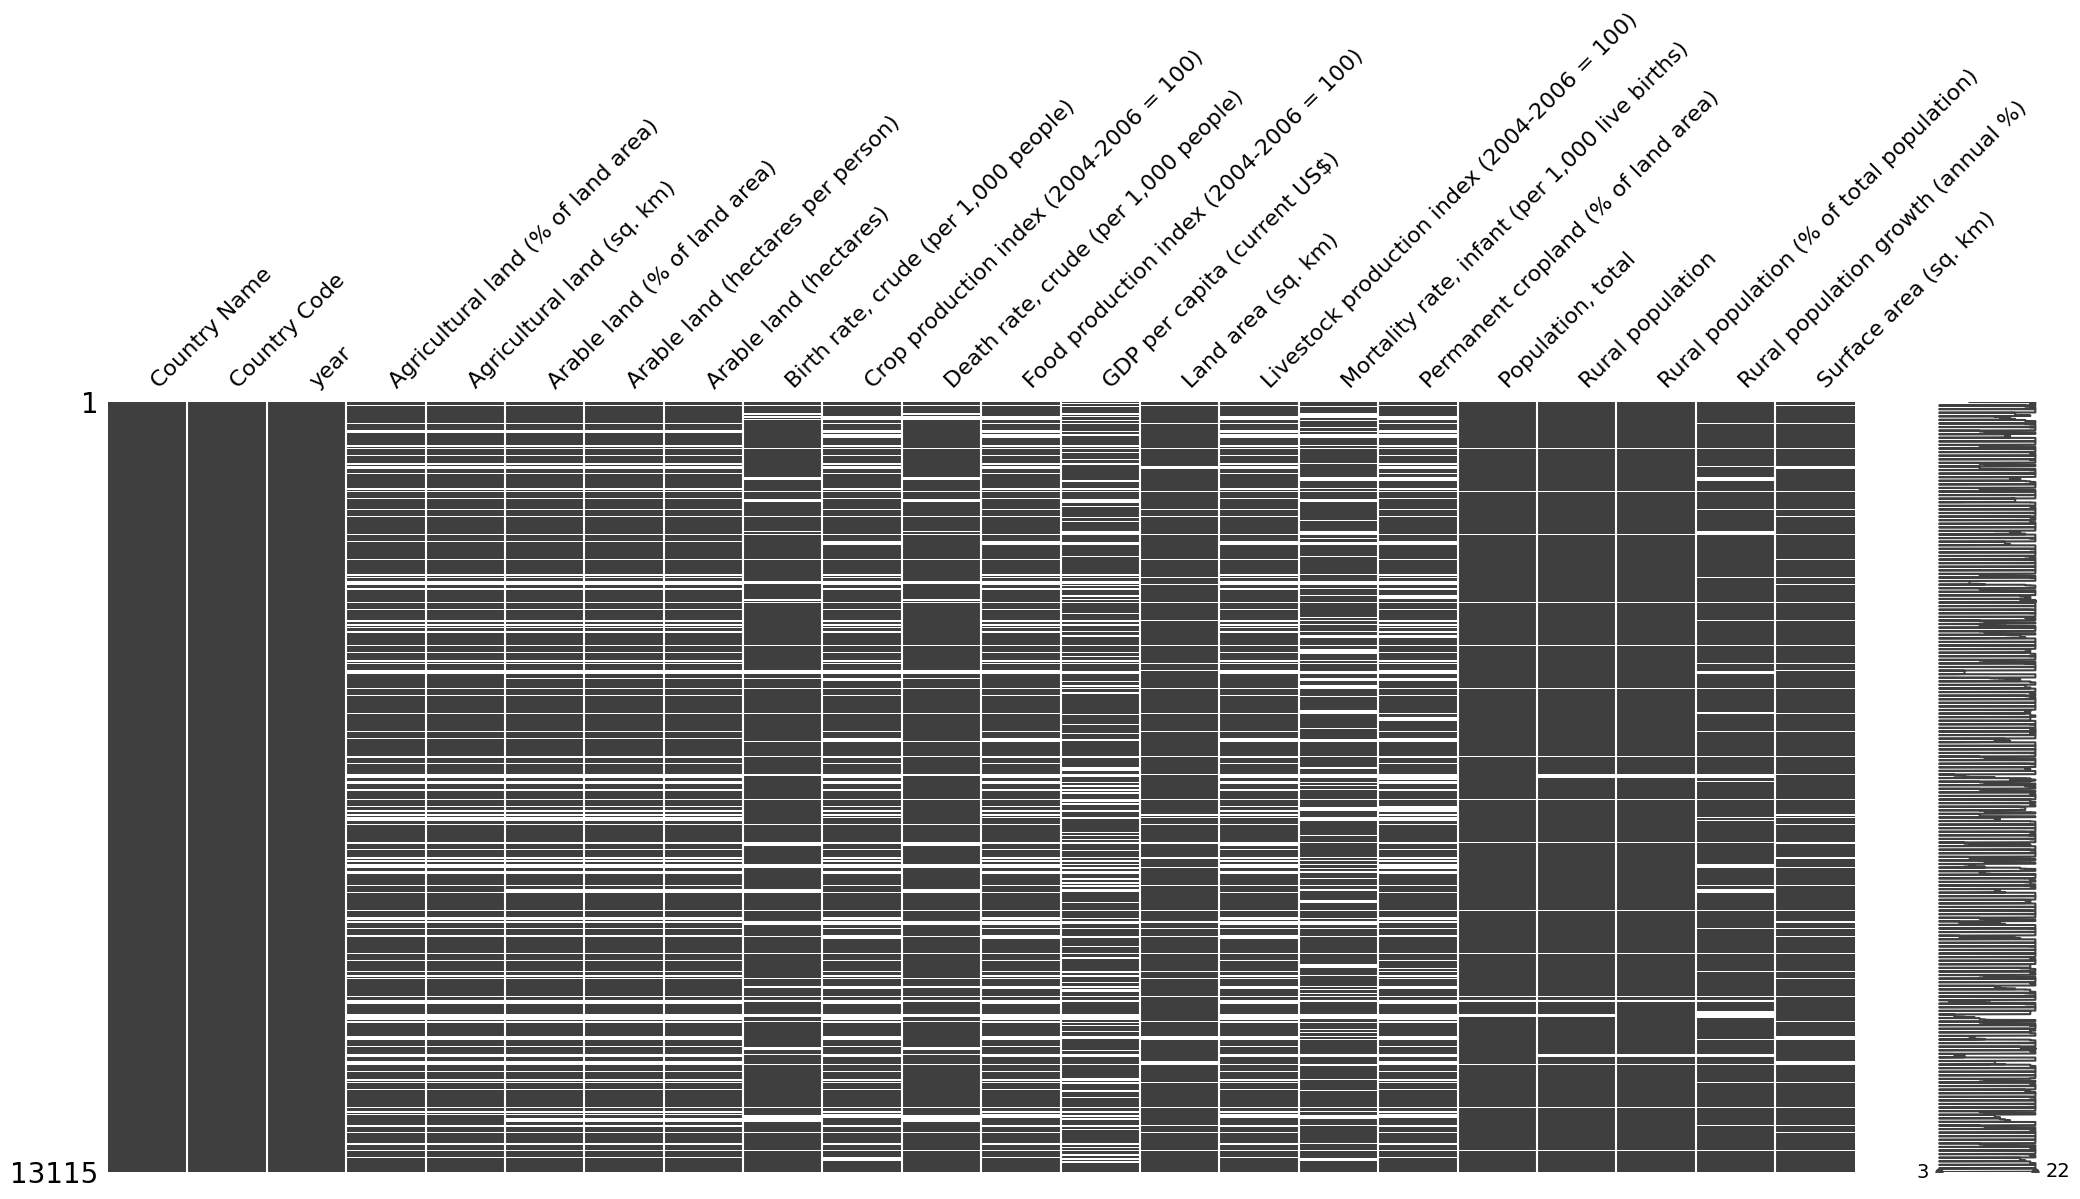

In [85]:
criteria = df[:].isna().sum() < 13115 * 0.3 # allowed nans
df_selected = df[criteria.index[criteria]]
msno.matrix(df_selected)

In [86]:
df_selected.columns.values

array(['Country Name', 'Country Code', 'year',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Arable land (% of land area)',
       'Arable land (hectares per person)', 'Arable land (hectares)',
       'Birth rate, crude (per 1,000 people)',
       'Crop production index (2004-2006 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (current US$)', 'Land area (sq. km)',
       'Livestock production index (2004-2006 = 100)',
       'Mortality rate, infant (per 1,000 live births)',
       'Permanent cropland (% of land area)', 'Population, total',
       'Rural population', 'Rural population (% of total population)',
       'Rural population growth (annual %)', 'Surface area (sq. km)'],
      dtype=object)

In [49]:
df_selected.dtypes

Cou_Nam         object
Cou_Cod         object
year             int64
Agr_lan        float64
Agr_lan        float64
Agr_lan        float64
Agr_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Ara_lan        float64
Bir_rat_cru    float64
Cro_pro_ind    float64
Dea_rat_cru    float64
Foo_pro_ind    float64
GDP_per_cap    float64
Lan_are        float64
Liv_pro_ind    float64
Mor_rat_inf    float64
Per_cro        float64
Pop_tot        float64
Rur_pop        float64
Rur_pop        float64
Rur_pop        float64
Rur_pop        float64
Rur_pop_gro    float64
Sur_are        float64
dtype: object

In [136]:
# print(df_selected.columns.values)

# df.groupby("Cou_Nam", group_keys=True).apply(lambda x: x)
df.groupby("Country Name", group_keys=True).apply(lambda x: x)




df_selected.iloc[0:60]["Country Name"]
sample_df = df_selected.iloc[0:60]
# df.iloc[61:122]["Cou_Nam"]
# df.iloc[123:182]["Cou_Nam"]
# df.iloc[183:244]["Cou_Nam"]

                   Country Name Country Code  year  \
Country Name                                         
Afghanistan  0      Afghanistan          AFG  1960   
             1      Afghanistan          AFG  1961   
             2      Afghanistan          AFG  1962   
             3      Afghanistan          AFG  1963   
             4      Afghanistan          AFG  1964   
...                         ...          ...   ...   
Zimbabwe     13110     Zimbabwe          ZWE  2016   
             13111     Zimbabwe          ZWE  2017   
             13112     Zimbabwe          ZWE  2018   
             13113     Zimbabwe          ZWE  2019   
             13114     Zimbabwe          ZWE  2020   

                    Access to electricity (% of population)  \
Country Name                                                  
Afghanistan  0                                          NaN   
             1                                          NaN   
             2                               

<AxesSubplot: >

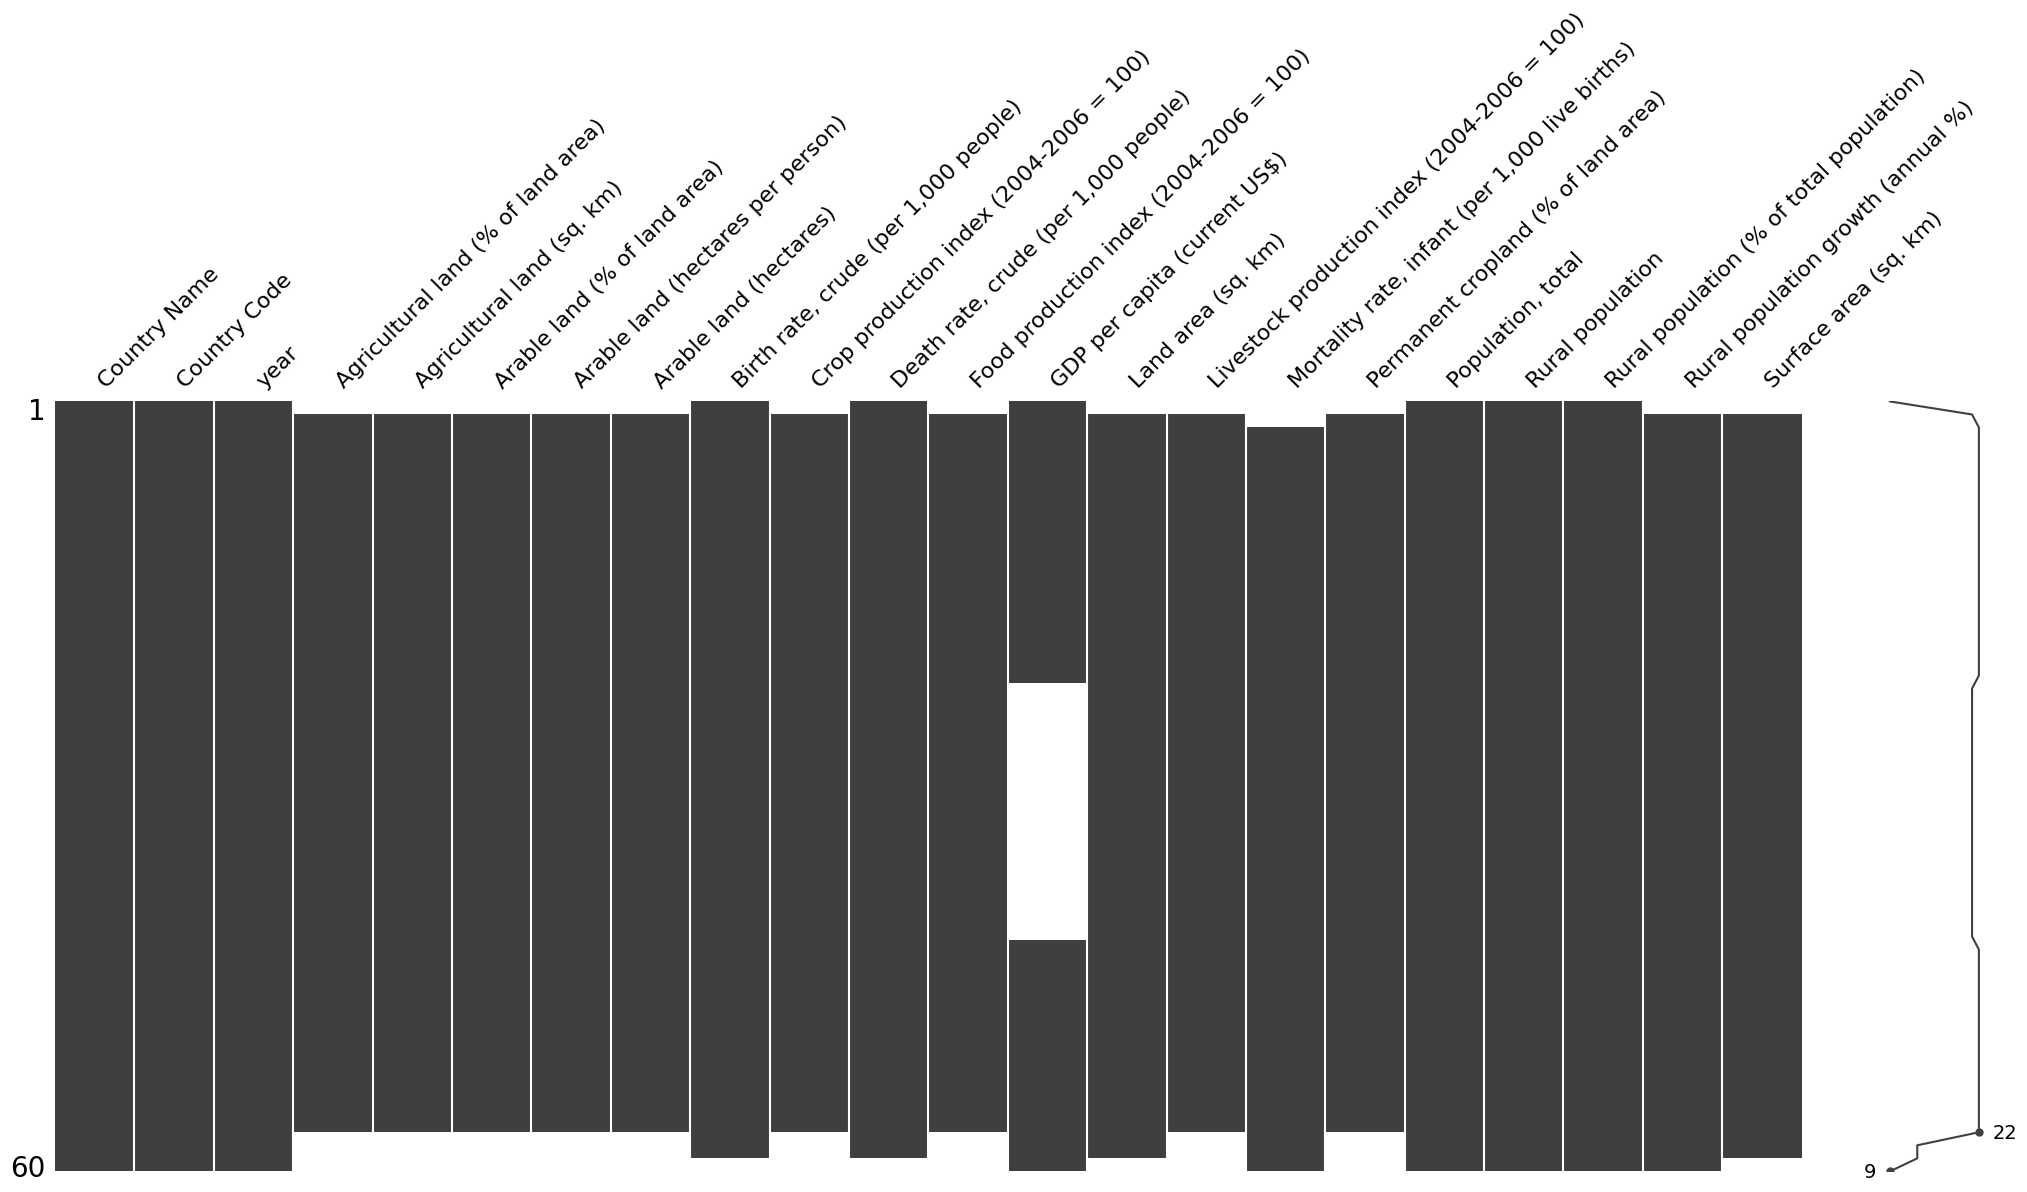

In [88]:
msno.matrix(sample_df)

In [89]:
sample_df.head()

,Country Name,Country Code,year,Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),"Birth rate, crude (per 1,000 people)",Crop production index (2004-2006 = 100),...,GDP per capita (current US$),Land area (sq. km),Livestock production index (2004-2006 = 100),"Mortality rate, infant (per 1,000 live births)",Permanent cropland (% of land area),"Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),Surface area (sq. km)
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,51.279,NaN,...,59.773194,NaN,NaN,NaN,NaN,8996973.0,8241137.0,91.599,NaN,NaN
1,Afghanistan,AFG,1961,57.745918,377000.0,11.717673,0.834296,7650000.0,51.373,65.69,...,59.860874,652860.0,43.37,NaN,0.076586,9169410.0,8373138.0,91.316,1.589040,652860.0
2,Afghanistan,AFG,1962,57.837821,377600.0,11.794259,0.823403,7700000.0,51.457,67.18,...,58.458015,652860.0,43.99,232.0,0.091903,9351441.0,8512056.0,91.024,1.645479,652860.0
3,Afghanistan,AFG,1963,57.914407,378100.0,11.870845,0.812096,7750000.0,51.530,65.58,...,78.706388,652860.0,47.03,227.8,0.091903,9543205.0,8657977.0,90.724,1.699758,652860.0
4,Afghanistan,AFG,1964,58.010906,378730.0,11.947431,0.800428,7800000.0,51.589,71.31,...,82.095231,652860.0,48.56,223.9,0.111816,9744781.0,8810646.0,90.414,1.747967,652860.0


<AxesSubplot: >

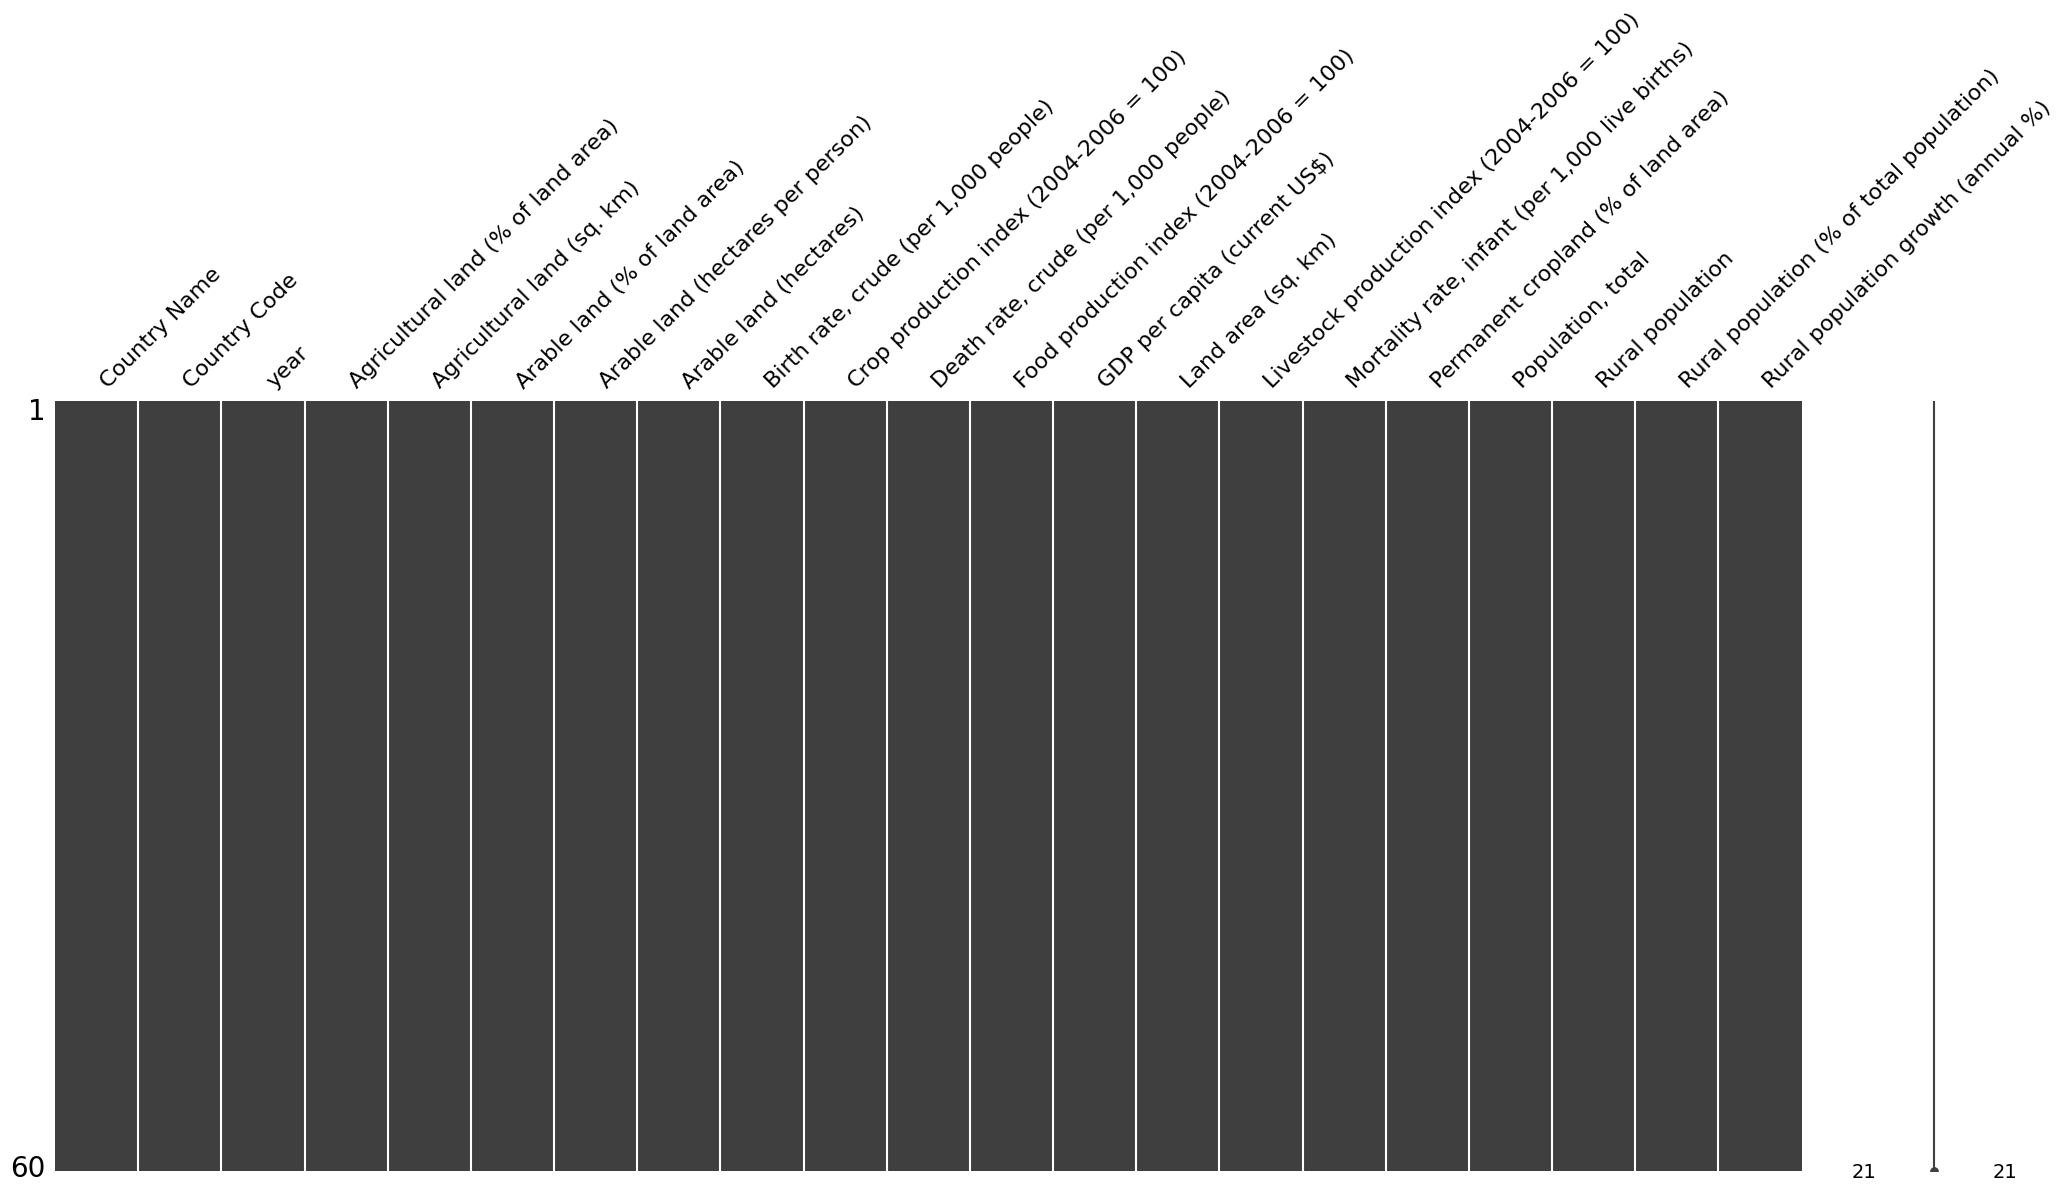

In [189]:
data = sample_df.iloc[:,3:-1].copy()

def myImputation(colm):
    sol = colm.interpolate(method='linear')
    sol = sol[::-1]
    sol = sol.interpolate(method='linear')
    sol = sol[::-1]
    colm = sol
    return colm

solution = data.apply(lambda x: myImputation(x), axis=0)
# data.head()
df_solution = pd.concat([sample_df.iloc[:,0:3], solution], axis=1, ignore_index=False)
msno.matrix(df_solution)



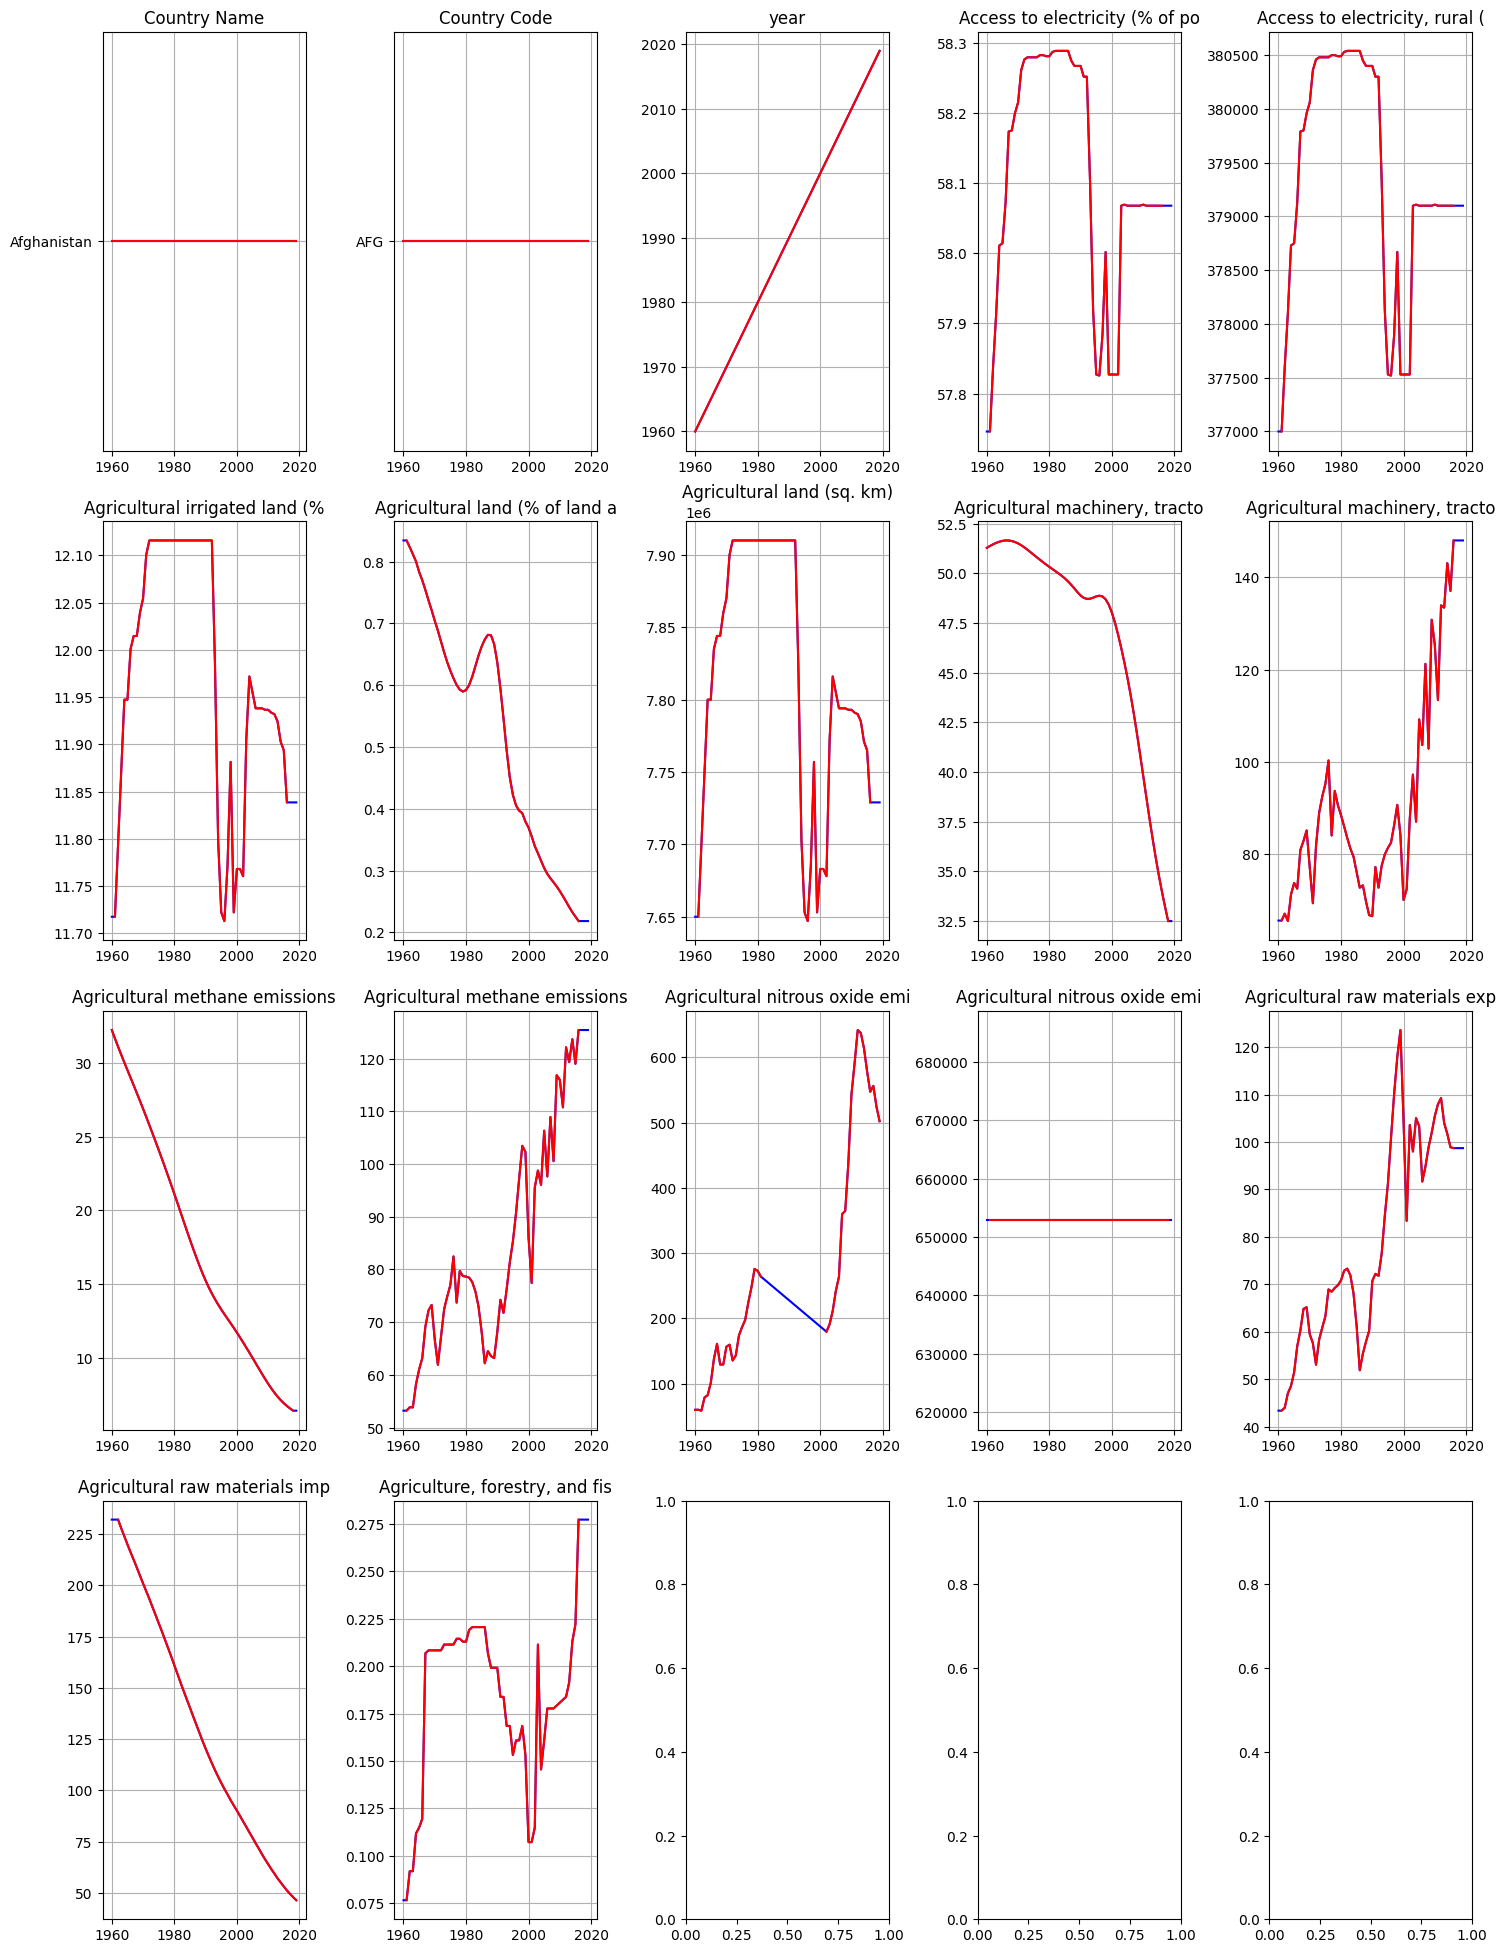

In [132]:
x = df_solution.iloc[:,2]

fig, axs = plt.subplots(4,5, figsize=(15,20))
fig.tight_layout(pad=3.0)
for i, nam in enumerate(df_solution.iloc[:,3:-1].columns.values):
    ax = axs[i//5, i%5]
    ax.set_title(names[i][0:30])
    ax.plot(x, df_solution.iloc[:,i], color='blue')
    ax.plot(x, sample_df.iloc[:,i], color='red')
    ax.set_axisbelow(True)
    ax.grid()


## Visualisation

### no imputation no cleanup

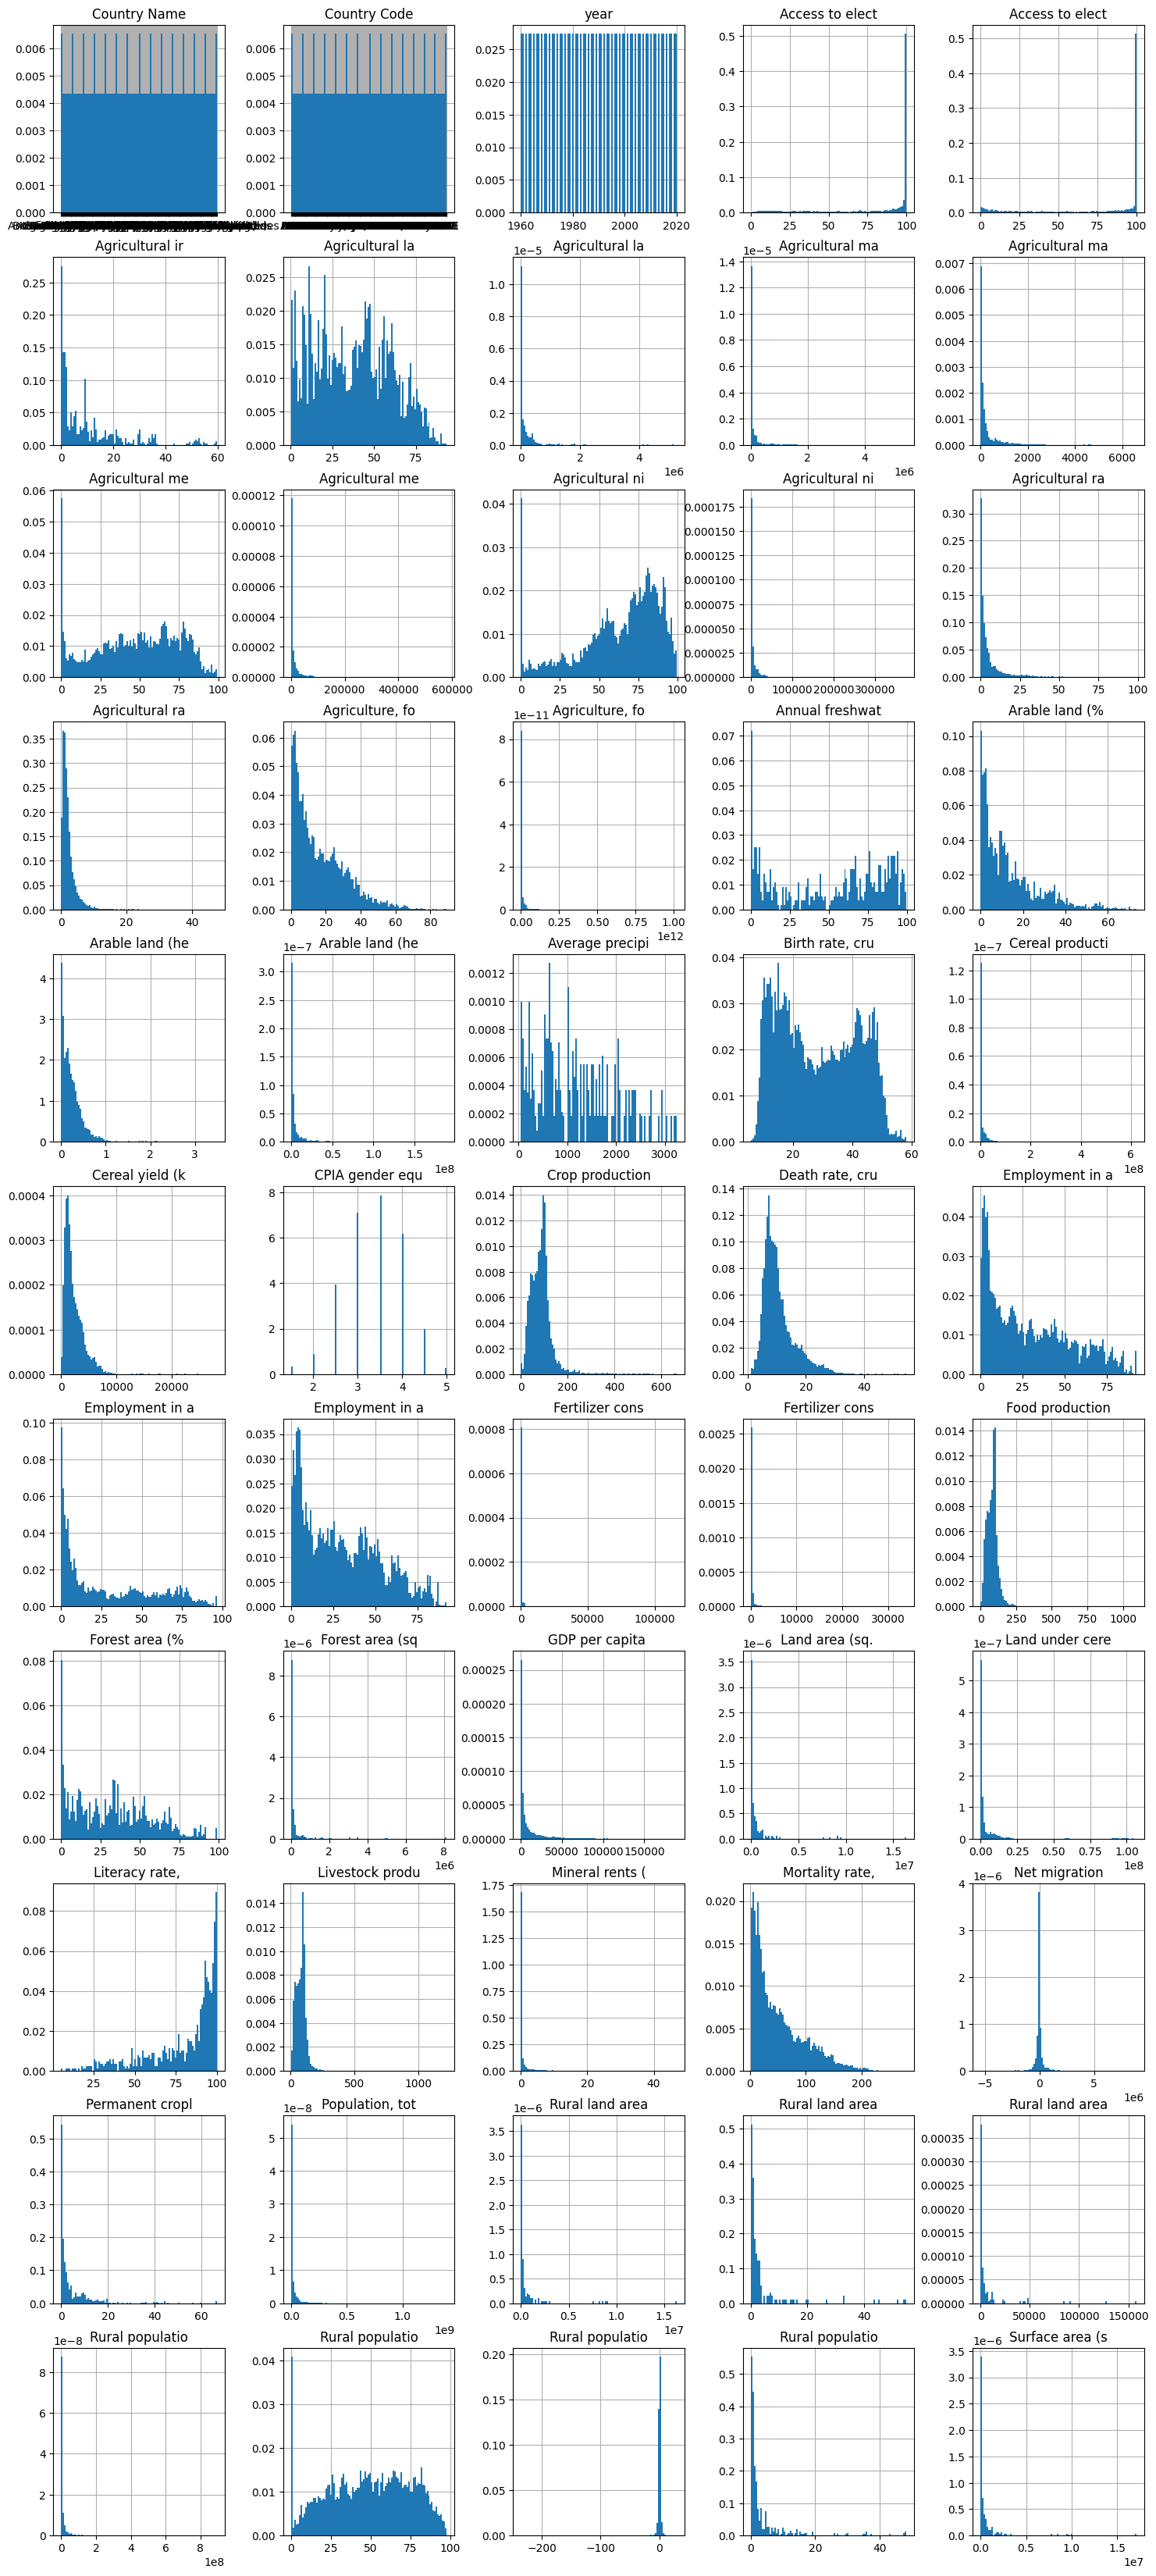

In [199]:
# varable distribution overview
alpha = 0.025

fig, axs = plt.subplots(11,5, figsize=(15,33))
fig.tight_layout(pad=2.0)
# fig.suptitle("distribution overview per feature")
for i, nam in enumerate(df.columns.values):
    ax = axs[i//5, i%5]
    ax.set_title(names[i][0:15])
    ax.hist(df[nam], bins=100, density=True)
    ax.set_axisbelow(True)
    ax.grid()


/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_42545/816694153.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=False)


<AxesSubplot: title={'center': 'Correlation plot'}>

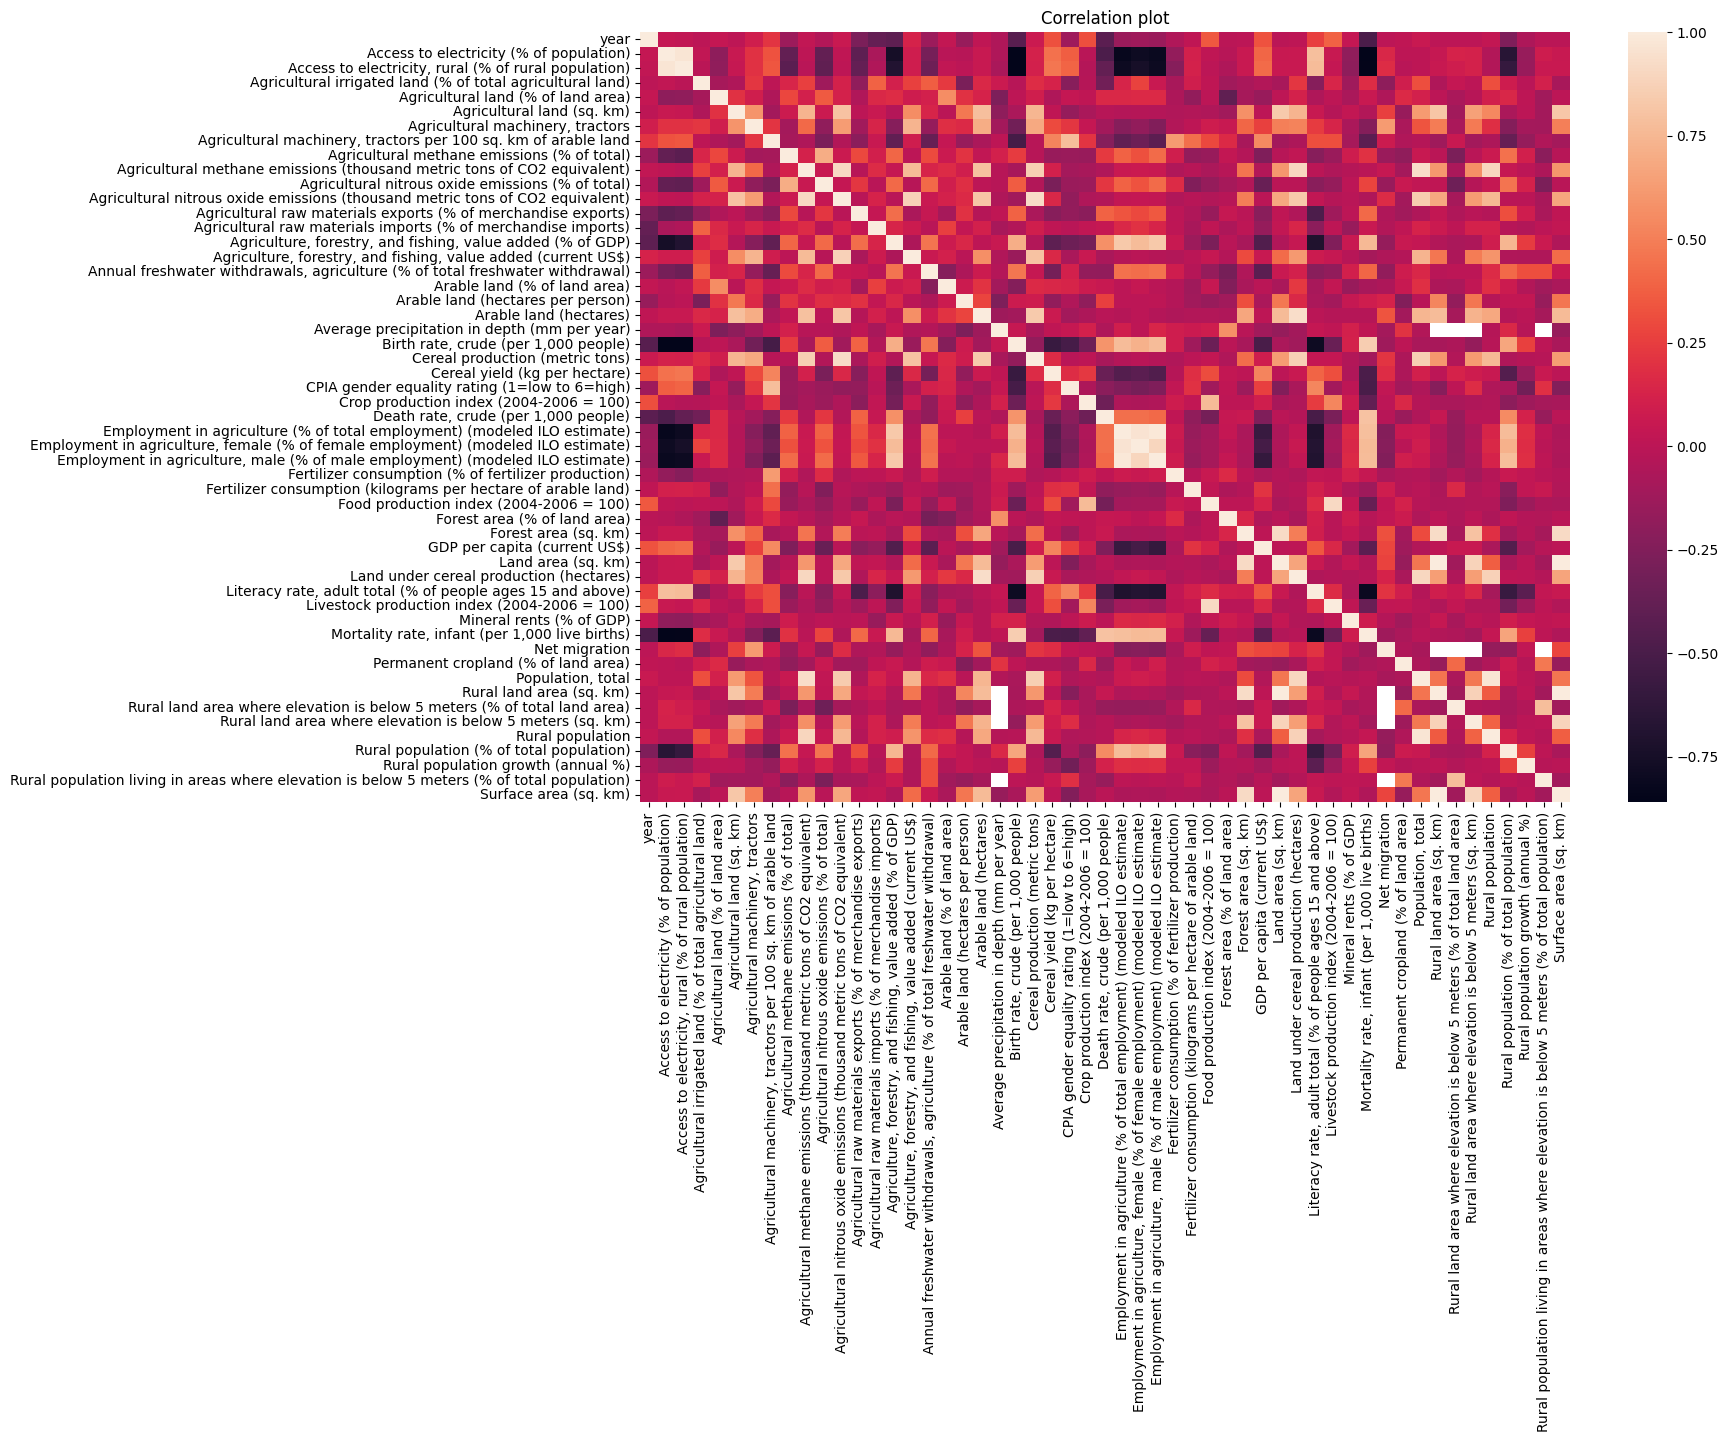

In [202]:
# heatmap - correlation visualisation
df_short = df.copy()
df_short.columns = short_names
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df.corr(), annot=False)

<AxesSubplot: >

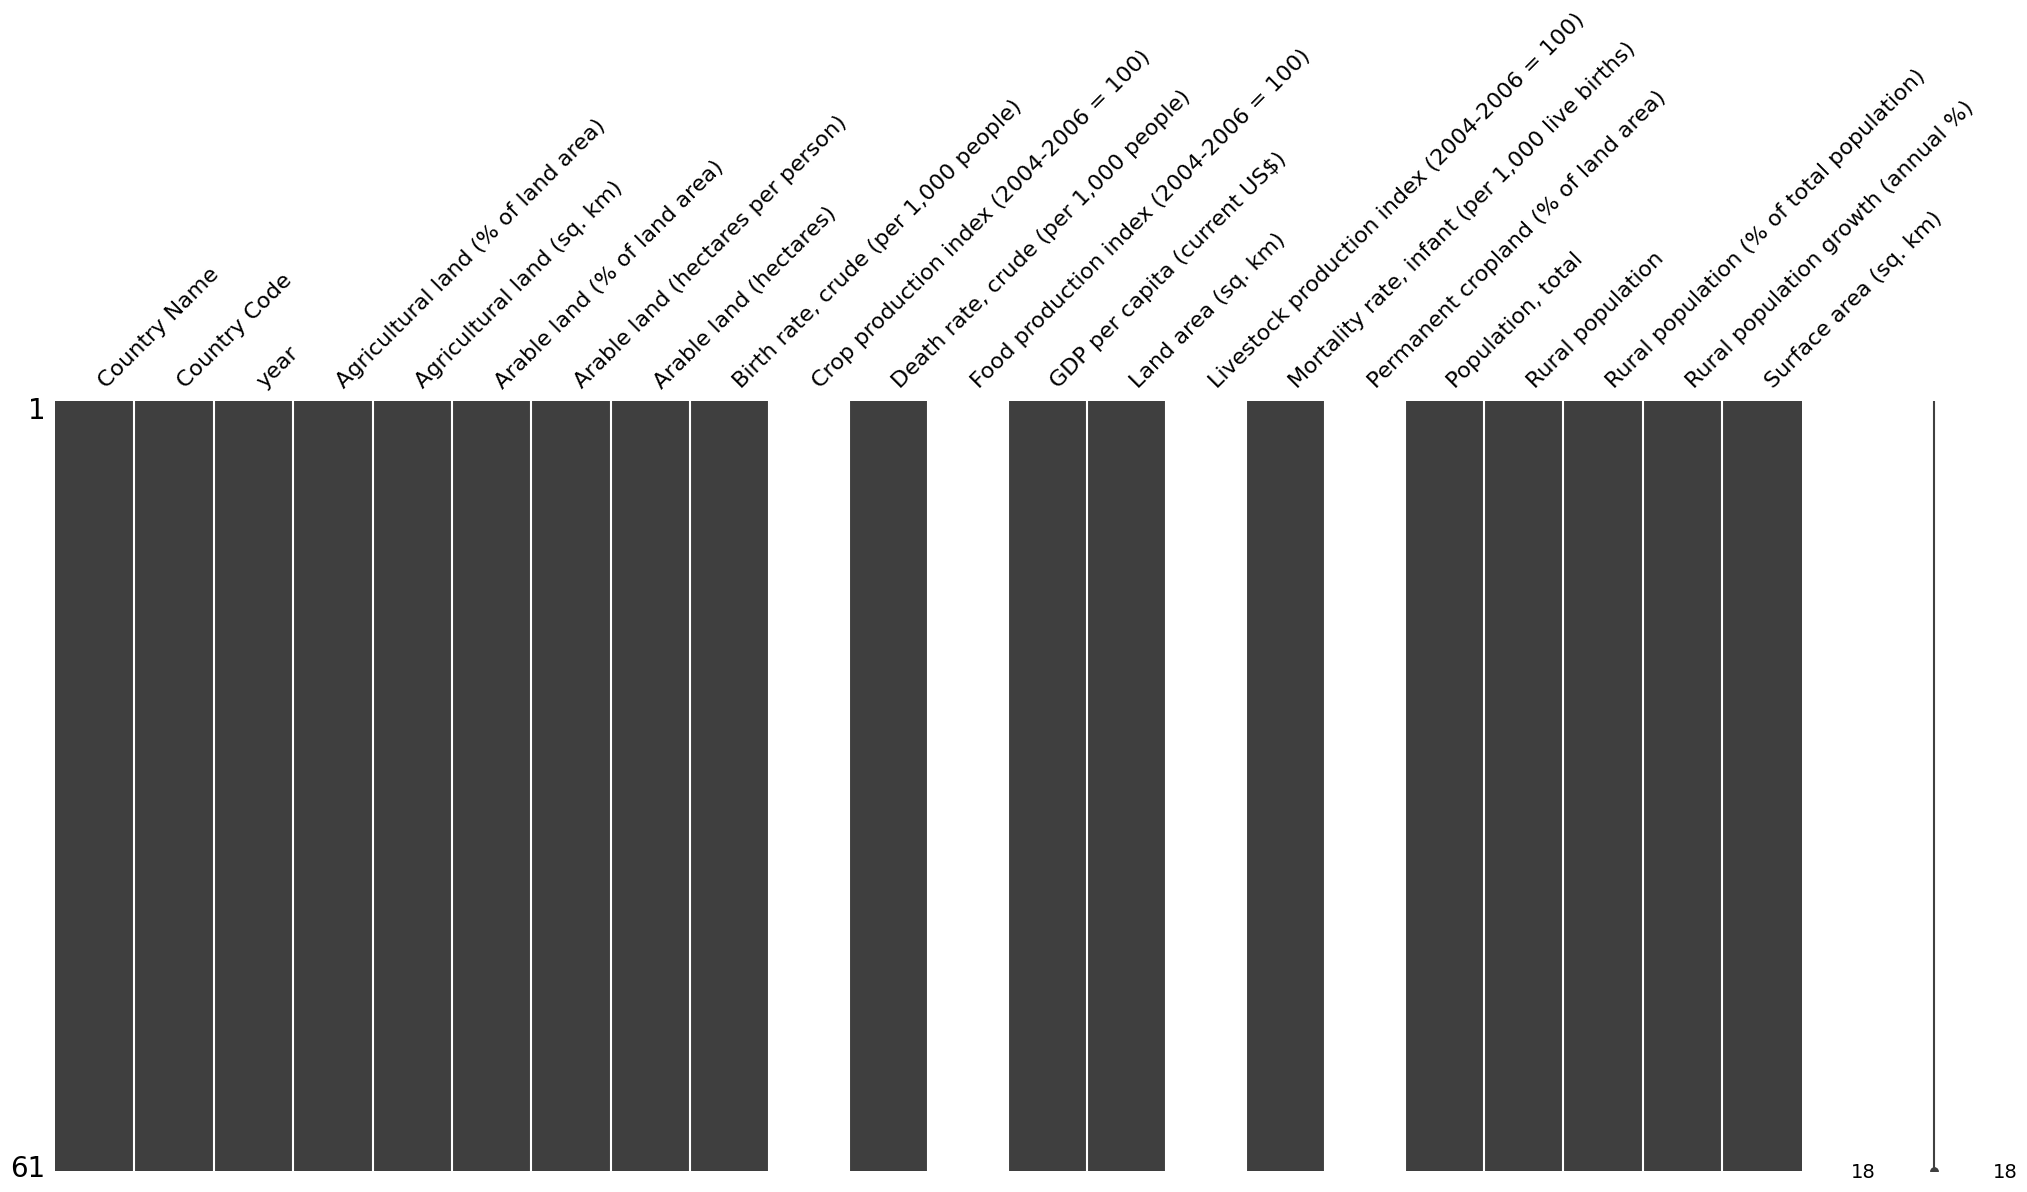

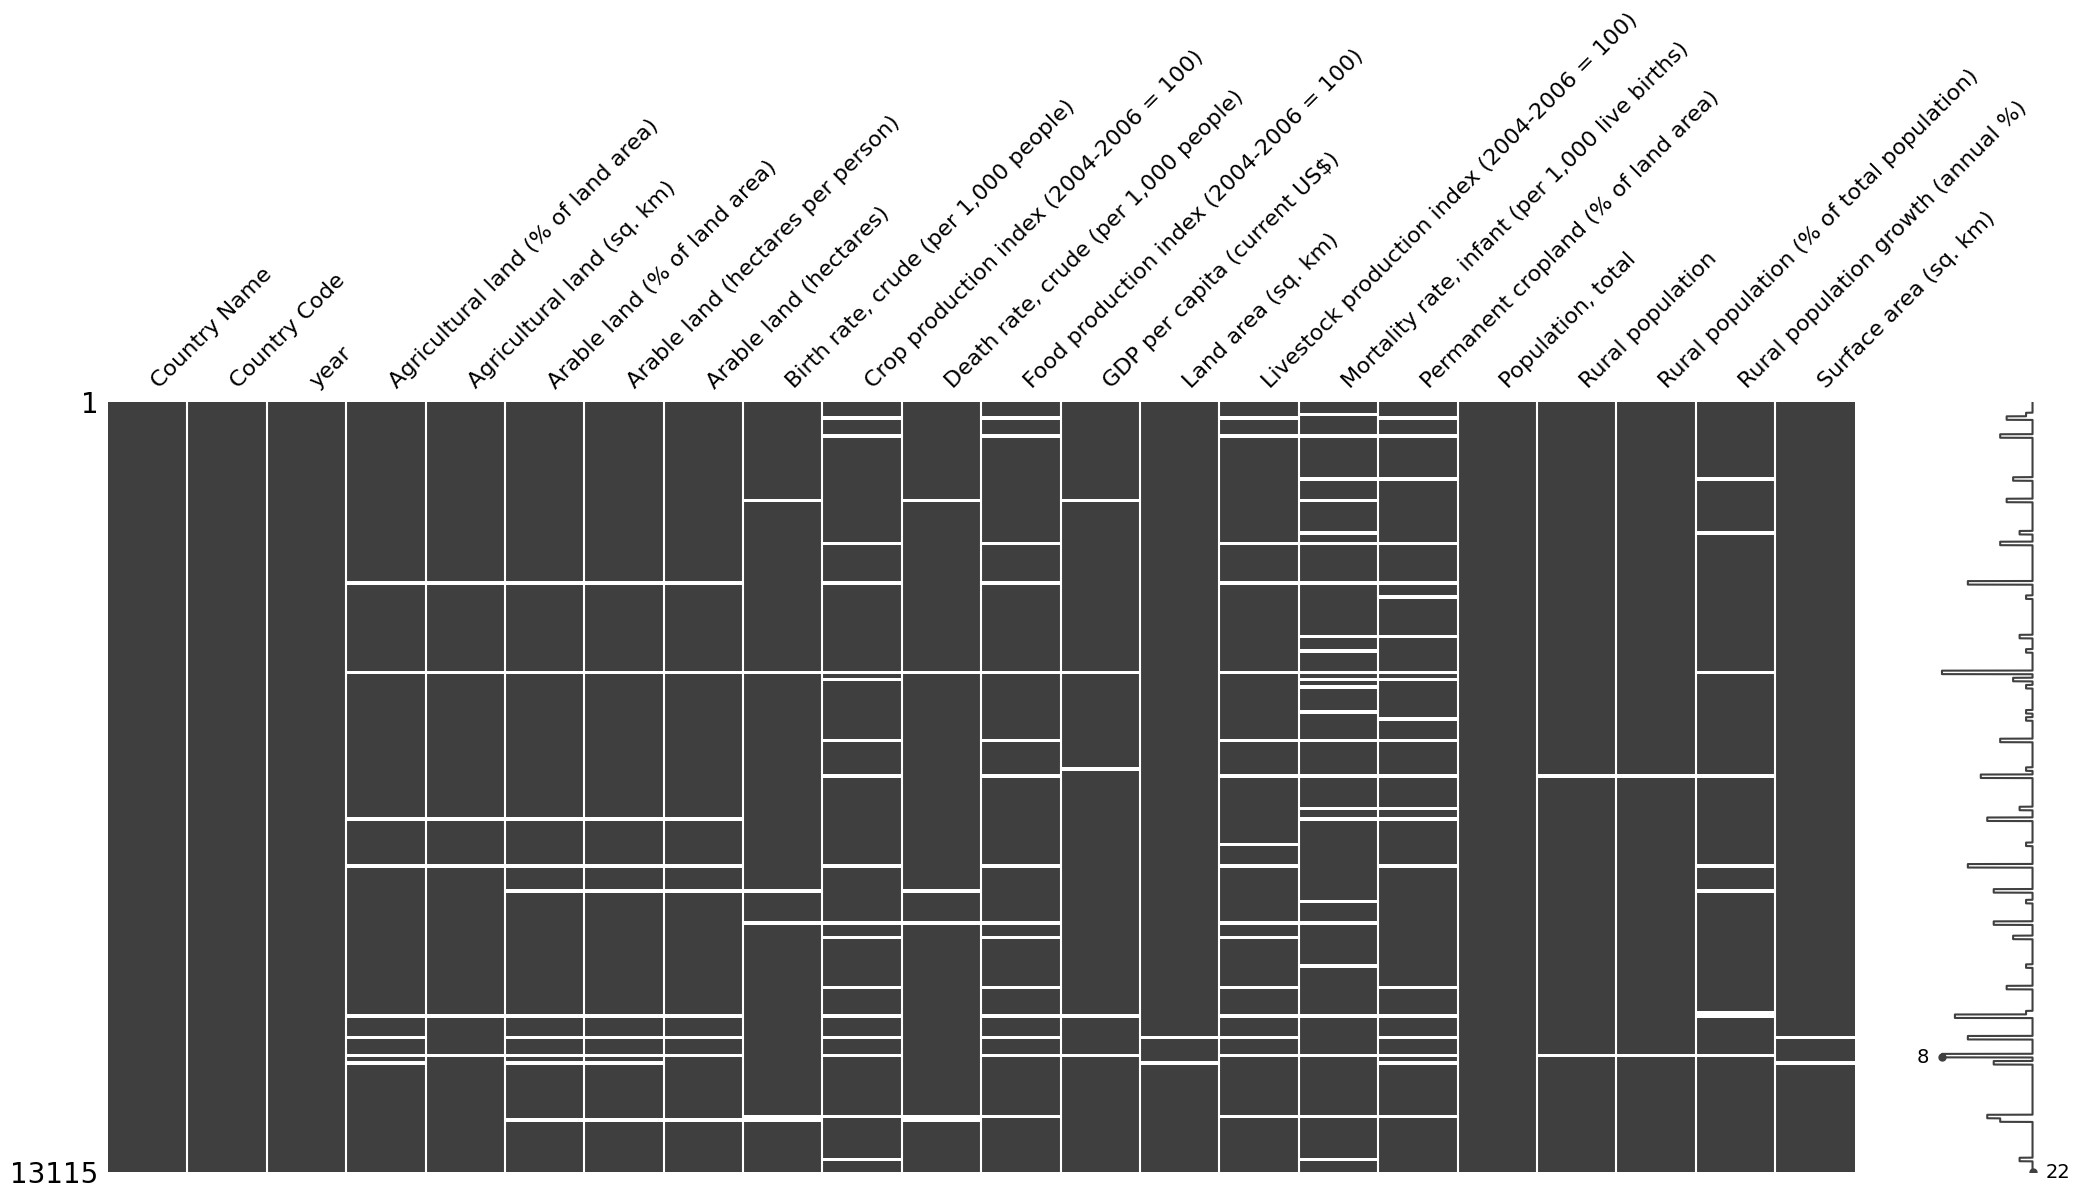

In [201]:
# df_grouped = df_selected.groupby("Country Name", group_keys=True)


country_names = sorted(list(set(df_selected["Country Name"])))
for cn in country_names:
    selected = df_selected.loc[df_selected["Country Name"] == cn,:]
    # print(selected.shape, selected['Country Name'].iloc[0])
    solution = df_selected.loc[df_selected["Country Name"] == cn,:].apply(lambda x: myImputation(x), axis=0)
    df_selected.loc[df_selected["Country Name"] == cn,:] = solution
msno.matrix(df_selected.loc[df_selected["Country Name"] == country_names[4],:])
msno.matrix(df_selected)


In [203]:
biggest_countries = cleaned.sort_values(by=f"Agricultural land (% of land area)", axis=0, ascending=False).loc[data["year"]==2000]
biggest_countries = biggest_countries[:10]
fig = plt.figure()

plt.bar(biggest_countries["Country Name"],
       biggest_countries[f"Agricultural land (% of land area)"])
#plt.show()

NameError: name 'cleaned' is not defined

# ====================

In [ ]:
# shorten column names
names = df.columns.values

def process_name(name):
    name = name.split(' (')[0]\
        .replace(" ", "_")\
        .replace(',','')\
        .replace('.','')
    names = name.split('_')
    if len(names) < 2: return name[:6]
    names = [nam[:3] for nam in names]
    name = '_'.join(names)
    # print(name)
    return name

short_names = list(map(process_name, names))

# df.columns = short_names